# Envriment

In [ ]:
!pip install rdkit padelpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 75.0 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

In [ ]:
from padelpy import from_smiles
descriptors = from_smiles('CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(=O)C')
descriptors
# print(len(descriptors))

In [ ]:
type(descriptors)

dict

In [ ]:
df['smiles']

0                   Nc1nc(NC2CC2)c3ncn(C4CC(CO)C=C4)c3n1
1      CC1OC(OC2C(O)C(O)C(OC3C(O)C(O)C(O)OC3CO)OC2CO)...
2               CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(=O)C
3                       CCN(CC)CCNC(=O)c1ccc(NC(=O)C)cc1
4                  OC(=O)COC(=O)Cc1ccccc1Nc2c(Cl)cccc2Cl
                             ...                        
935                         c1ccc2c(c1)c(no2)CS(=O)(=O)N
936     CN1CCN(CC1)C(=O)OC2c3c(nccn3)C(=O)N2c4ccc(cn4)Cl
937                   CN(C)CCOC1=Cc2ccccc2Sc3c1cc(cc3)Cl
938                   CN(C)CCOC1=Cc2cc(ccc2Sc3c1cccc3)Cl
939     c1ccc2c(c1)/C(=C\CCN3CCN(CC3)CCO)/c4cc(ccc4S2)Cl
Name: smiles, Length: 940, dtype: object

In [ ]:
import pandas as pd
df = pd.read_excel('/content/CNSData(940).xlsx')
df

,ID,name,smiles,output
0,1,ABACAVIRSULFATE,Nc1nc(NC2CC2)c3ncn(C4CC(CO)C=C4)c3n1,0
1,2,ACARBOSE,CC1OC(OC2C(O)C(O)C(OC3C(O)C(O)C(O)OC3CO)OC2CO)...,0
2,3,ACEBUTOLOL,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(=O)C,0
3,4,ACECAINIDE,CCN(CC)CCNC(=O)c1ccc(NC(=O)C)cc1,0
4,5,ACECLOFENAC,OC(=O)COC(=O)Cc1ccccc1Nc2c(Cl)cccc2Cl,0
...,...,...,...,...
935,936,ZONISAMIDE,c1ccc2c(c1)c(no2)CS(=O)(=O)N,1
936,937,ZOPICLONE,CN1CCN(CC1)C(=O)OC2c3c(nccn3)C(=O)N2c4ccc(cn4)Cl,1
937,938,ZOTEPINE,CN(C)CCOC1=Cc2ccccc2Sc3c1cc(cc3)Cl,1
938,939,ZOTEPINE,CN(C)CCOC1=Cc2cc(ccc2Sc3c1cccc3)Cl,1


In [ ]:
def smiles_To_descriptors(df, col):

  result = pd.DataFrame()
  for i in df[col]:
    descriptors = from_smiles(i)
    aa = pd.DataFrame.from_dict(descriptors, orient='index').T
    result = pd.concat([result, aa])
    print(i)
  return result

qq = smiles_To_descriptors(df, 'smiles')
qq

Nc1nc(NC2CC2)c3ncn(C4CC(CO)C=C4)c3n1
CC1OC(OC2C(O)C(O)C(OC3C(O)C(O)C(O)OC3CO)OC2CO)C(O)C(O)C1NC4C=C(CO)C(O)C(O)C4O
CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(c1)C(=O)C
CCN(CC)CCNC(=O)c1ccc(NC(=O)C)cc1
OC(=O)COC(=O)Cc1ccccc1Nc2c(Cl)cccc2Cl


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,-1.8652999999999995,3.4793440899999983,47.889100000000006,44.04427399999998,9,10,39,21,18,...,0.8599875516869347,0.11936776513192293,0.5717712017570608,0.4094705561149402,0.2647241356389997,20.52061988047427,51.741423856941545,90.57501766925765,0.7899813275304021,1.2459658935110007
0,0,-7.226299999999998,52.21941168999998,137.768,88.20809899999992,0,0,87,44,43,...,0.867266748080876,0.08537992818056282,0.5872195449182649,0.4439474944417814,0.47257788011267543,40.81136797212245,198.46598768884337,477.6203576452659,0.8009001221213141,1.5037449194727217
0,0,-2.1004,4.41168016,67.07270000000001,55.758203999999964,6,6,52,24,28,...,0.9107576908152359,0.057143214180078866,0.49420214193214995,0.31955905148032976,0.3863925332141251,29.37022633428367,71.69357328462723,143.38735859417474,0.866136536222854,1.200153726626605
0,0,-0.5178999999999999,0.2682204099999999,52.610800000000005,46.64023899999998,6,6,43,20,23,...,0.9081897639711074,0.04895185552395173,0.5339583440164845,0.38755944994456004,0.4704491176698194,24.128665182033025,49.76529757085211,100.65983548079785,0.8622846459566611,1.391966911630864
0,1,0.5702999999999996,0.32524208999999954,37.1534,45.49630899999999,12,12,36,23,13,...,0.637071958260413,0.32840323244242176,0.4784157148398909,0.4016241209470858,0.35825429893567107,15.813288020698952,60.651906193112545,105.02753157176315,0.4556079373906194,1.238294134722648


# Cpd Info

In [ ]:
# Warfarin
SMILES = "CC(=O)CC(C1=CC=CC=C1)C2=C(C3=CC=CC=C3OC2=O)O"

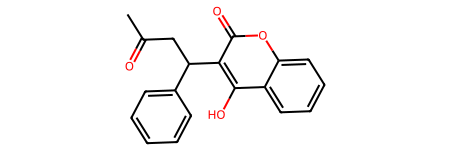

In [ ]:
# Mol format
Warfarin = Chem.MolFromSmiles(SMILES)
Warfarin

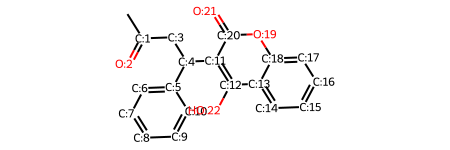

In [ ]:
# Show Atom
for atom in Warfarin.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())

Warfarin

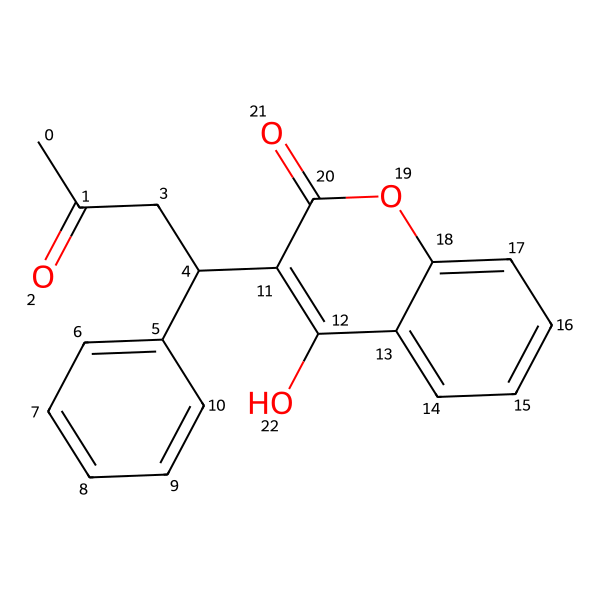

In [ ]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 600, 600

Warfarin = Chem.MolFromSmiles(SMILES)
Warfarin

# Descriptors

In [ ]:
DescList = Descriptors._descList
print("# of Descriptors: " + str(len(DescList)))
DescList[0: 5]

# of Descriptors: 209


[('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>),
 ('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('qed',
  <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>)]

In [ ]:
print("MaxEStateIndex: " + str(Descriptors.MaxEStateIndex(Warfarin)))
print("MinEStateIndex: " + str(Descriptors.MinEStateIndex(Warfarin)))
print("MaxAbsEStateIndex: " + str(Descriptors.MaxAbsEStateIndex(Warfarin)))
print("MinAbsEStateIndex: " + str(Descriptors.MinAbsEStateIndex(Warfarin)))
print("qed: " + str(Descriptors.qed(Warfarin)))


MaxEStateIndex: 12.41230678382464
MinEStateIndex: -0.614534202569917
MaxAbsEStateIndex: 12.41230678382464
MinAbsEStateIndex: 0.06406326110691185
qed: 0.7476258148419598


In [ ]:
print(Descriptors._descList[0][1](Warfarin))
print(Descriptors._descList[1][1](Warfarin))
print(Descriptors._descList[2][1](Warfarin))
print(Descriptors._descList[3][1](Warfarin))
print(Descriptors._descList[4][1](Warfarin))

12.41230678382464
-0.614534202569917
12.41230678382464
0.06406326110691185
0.7476258148419598


In [ ]:
DSV = []
for i in range(len(DescList)):
  DSV.append(Descriptors._descList[i][1](Warfarin))
DSV


In [ ]:
def getMolDescriptors(mol, MissingValue = None):
    Result = {}
    for DescName, Fun in Descriptors._descList:
        try:
            DescValue = Fun(mol)
        except:
            import traceback
            traceback.print_exc()
            DescValue = MissingValue
        Result[DescName] = DescValue
    return Result

In [ ]:
getMolDescriptors(Warfarin)

# Reading Sets of Molecules
